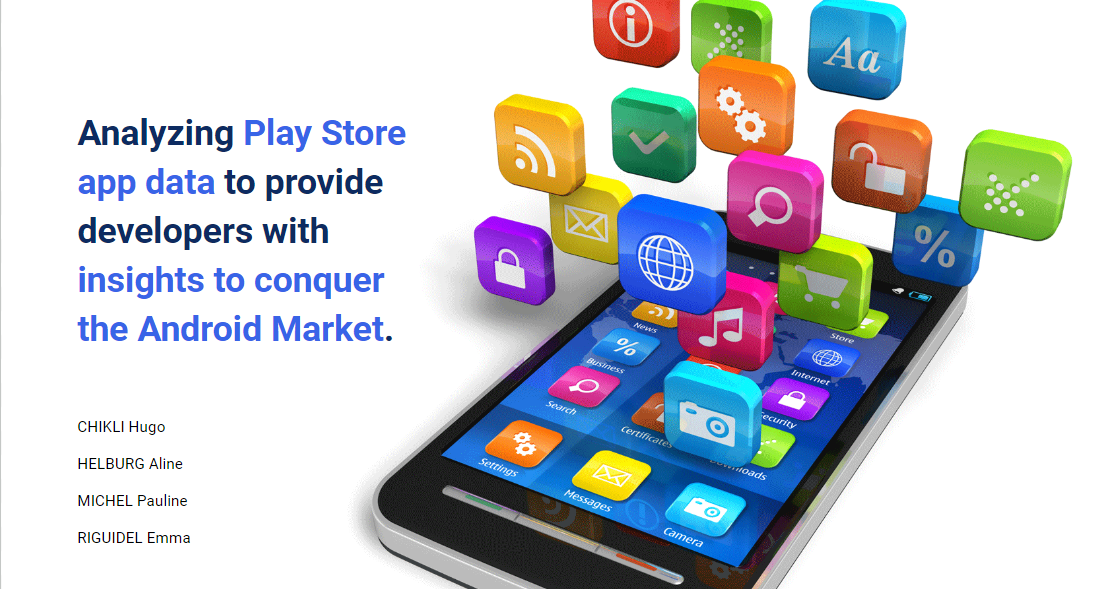

# **Importing the data**

In [ ]:
import pandas as pd
import altair as alt
alt.data_transformers.disable_max_rows()

from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing csv into pandas dataframe
df = pd.read_csv('/content/googleplaystore.csv') 
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#looking at the data for the shape, type and potential duplicates
print(df.shape)
print(df.dtypes)
df[df.duplicated(keep='first')]

(10841, 13)
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


# **Cleaning the data**

In [ ]:
#droping duplicates
df.drop_duplicates(subset='App', inplace=True)
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']
print(df.shape)

(9659, 13)


In [ ]:
#cleaning the columns Installs and Price
df['Installs'] = df['Installs'].apply(lambda row: row.replace('+', '') if '+' in str(row) else row) #removing the '+'
df['Installs'] = df['Installs'].apply(lambda row: row.replace(',', '') if ',' in str(row) else row) #removing the ','
df['Installs'] = df['Installs'].apply(lambda row: int(row)) #changing the type to int
df['Price'] = df['Price'].apply(lambda row: str(row).replace('$', '') if '$' in str(row) else str(row))
df['Price'] = df['Price'].apply(lambda row: float(row))
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#cleaning the column size
df['Size'] = df['Size'].apply(lambda row: row.replace('M', '000000' if '.' not in row else '00000'))
df['Size'] = df['Size'].apply(lambda row: row.replace('k', '000' if '.' not in row else '00'))
df['Size'] = df['Size'].apply(lambda row: row.replace('Varies with device','0'))
df['Size'] = df['Size'].apply(lambda row: row.replace('.',''))
df['Size'] = df['Size'].apply(lambda row: float(row))
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
#computing the column revenue
df['Revenue'] = df.Price * df.Installs 

In [ ]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Revenue           float64
dtype: object


In [ ]:
df['Reviews']= df['Reviews'].astype(int)

In [ ]:
df_agg = df.groupby(["Category",'Type'], as_index = False)[["Revenue",'Price','Rating','Installs','Reviews','Size']].median()

In [ ]:
df_agg['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'], dtype=object)

In [ ]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Revenue           float64
dtype: object


In [ ]:
df_agg.dtypes

Category     object
Type         object
Revenue     float64
Price       float64
Rating      float64
Installs    float64
Reviews     float64
Size        float64
dtype: object

In [ ]:
# Define the color scale
scale = alt.Scale(domain=['ENTERTAINMENT', 'EDUCATION', 'WEATHER', 'FOOD_AND_DRINK', 'PARENTING','GAME', 'HEALTH_AND_FITNESS','FAMILY','COMMUNICATION'],
                  range=["#b30000", "#7c1158", "#4421af",  "#e6d800", "#8c564b", "#00b7c7", "#7f7f7f","#ff7f0e","#8be04e",'#e377c2'])
color = alt.Color('Category:N', scale = scale)

In [ ]:
# Filter rows where 'Category' is equal to 'game' or 'heath' etc
categories_to_keep = ['ENTERTAINMENT', 'EDUCATION', 'WEATHER', 'FOOD_AND_DRINK', 'PARENTING','GAME', 'HEALTH_AND_FITNESS','FAMILY','COMMUNICATION']
df_final = df_agg[df_agg['Category'].isin(categories_to_keep)]

# Optional: Reset the index if you want to reindex the filtered DataFrame
df_final.reset_index(drop=True, inplace=True)

# Print the filtered DataFrame
df_final

,Category,Type,Revenue,Price,Rating,Installs,Reviews,Size
0,COMMUNICATION,Free,0.0,0.00,4.20,500000.0,5646.0,4200000.0
1,COMMUNICATION,Paid,2490.0,2.49,4.25,1000.0,88.0,1300000.0
2,EDUCATION,Free,0.0,0.00,4.40,1000000.0,14206.0,6900000.0
3,EDUCATION,Paid,202495.0,3.99,4.70,50500.0,1774.5,34000000.0
4,ENTERTAINMENT,Free,0.0,0.00,4.20,3000000.0,40409.5,9350000.0
5,ENTERTAINMENT,Paid,399000.0,3.99,4.60,100000.0,5004.5,26500000.0
6,FAMILY,Free,0.0,0.00,4.30,100000.0,745.5,16000000.0
7,FAMILY,Paid,14950.0,2.99,4.40,5000.0,185.0,18000000.0
8,FOOD_AND_DRINK,Free,0.0,0.00,4.30,500000.0,3779.0,13000000.0
9,FOOD_AND_DRINK,Paid,142200.0,4.24,4.35,30000.0,1698.5,1150000.0


In [ ]:
df_final.dtypes

Category     object
Type         object
Revenue     float64
Price       float64
Rating      float64
Installs    float64
Reviews     float64
Size        float64
dtype: object

In [ ]:
df_final['Category'] = df_final['Category'].astype('category')
df_final['Type'] = df_final['Type'].astype('category')

# **Bubble & Bar Plot**

In [ ]:
import numpy as np

type_selection = np.array(df_final["Type"].unique())

type_selection_radio = alt.binding_radio(options=type_selection)
type_selection_select = alt.selection_single(
    fields=["Type"],
    bind=type_selection_radio,
    name="Type",
    init={"Type": "Paid"}  # Set the default value of Type to "PAID"
)

In [ ]:
# Create multiple selection on the bar chart
click = alt.selection_multi(encodings=['color'])
# Create interval selecion on the bubble chart
brush = alt.selection_interval(encodings=['x'])


Bubble_chart = alt.Chart(df_final).mark_point(filled=True).encode(
    alt.X('Reviews:Q', title='Median number of reviews',scale=alt.Scale(domain=[-500, 42000])),
    alt.Y('Rating:Q',
        title='Median ratings per categories',
        scale=alt.Scale(domain=[3.9, 4.8])
    ),
    color=color,
    # size=alt.value(100),
     size=alt.Size('Revenue:Q', scale=alt.Scale(range=[100, 1000]))
   # size=alt.Size(scale=alt.Scale(range=[50, 400]))
).properties(
    width=300,
    height=300
).transform_filter(
# Filter the data when user clicks on the bar chart
    click
).add_selection(type_selection_select).transform_filter(type_selection_select).properties(title="Number of reviews & median Rating by category ").interactive()


In [ ]:
bar_chart = alt.Chart(df_final).mark_bar().encode(
    x=alt.X('Size:Q', title='Median size of app',scale=alt.Scale(domain=(0, 41000000))),  # Adjust the scale of x-axis
    y='Category:N',
    # Change the bar color based on the multiple selection
    color=alt.condition(click, color, alt.value('lightgrey'))
).properties(width=300).add_selection(
    # Add multiple selection to the bar chart
    click
).add_selection(type_selection_select).transform_filter(type_selection_select).properties(title="Median size of app by category").interactive()

In [ ]:
Bubble_chart &  bar_chart 

alt.VConcatChart(...)

# **Revenue Plot**

In [ ]:
categories_to_keep  = ['ENTERTAINMENT', 'EDUCATION', 'WEATHER', 'FOOD_AND_DRINK', 'PARENTING','GAME', 'HEALTH_AND_FITNESS','FAMILY','COMMUNICATION']
                 # range=["#b30000", "#7c1158", "#4421af",  "#e6d800", "#8c564b", "#00b7c7", "#7f7f7f", "#8be04e","#ff7f0e",'#e377c2'])
#color = alt.Color('Category:N', scale = scale)
custom_color_scale = ["#b30000", "#7c1158", "#4421af",  "#e6d800", "#8c564b", "#00b7c7", "#7f7f7f", "#8be04e","#ff7f0e"]

df_paid = df[(df['Type'] == 'Paid') & (df['Category'].isin(categories_to_keep))]

In [ ]:
df_paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,0.0,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,399000.0
851,Sago Mini Hat Maker,EDUCATION,4.9,11,63000000.0,1000,Paid,3.99,Everyone,Education;Pretend Play,"July 24, 2017",1.0,4.0.3 and up,3990.0
852,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION,4.7,21,44000000.0,1000,Paid,5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up,5990.0
853,Toca Life: City,EDUCATION,4.7,31085,24000000.0,500000,Paid,3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up,1995000.0
854,Toca Life: Hospital,EDUCATION,4.7,3528,24000000.0,100000,Paid,3.99,Everyone,Education;Pretend Play,"June 12, 2018",1.1.1-play,4.4 and up,399000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157000.0,100,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up,99.0
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400000.0,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,7990.0
10782,Trine 2: Complete Story,GAME,3.8,252,11000000.0,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,169900.0
10785,"sugar, sugar",FAMILY,4.2,1405,9500000.0,10000,Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up,12000.0


In [ ]:
# Create a dropdown selection binding for Content Rating
content_rating_selection = alt.binding_select(options=df_paid['Content Rating'].unique().tolist(), name='Age target  ')
content_rating_selector = alt.selection_single(fields=['Content Rating'], bind=content_rating_selection)

# Create a custom color scale with darker colors
brush = alt.selection_interval(encodings=['x'])

custom_color_scale = alt.Scale(range=["#b30000", "#7c1158", "#4421af",  "#e6d800", "#8c564b", "#00b7c7", "#7f7f7f", "#8be04e","#ff7f0e",'#e377c2'])

# Update the color encoding to use the custom color scale
color_encoding = alt.condition(
    content_rating_selector | brush,
    alt.Color("Category:N", legend=None, scale=custom_color_scale),
    alt.value('transparent')
)
## add app name & revenue generated when hoovering
tooltip = [  alt.Tooltip('App', title='App Name'), alt.Tooltip('Revenue', title='Revenue', format='$,.2f')]

# Create chart
revenue_chart = alt.Chart(df_paid).mark_point(size=50).encode(
    x=alt.X("Category:N", title='Category', scale=alt.Scale(padding=1)),
    y=alt.Y("Revenue:Q", title = 'Revenue of app ($)'),
    color=color_encoding,
    tooltip=tooltip
).properties(
    width=1000
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).transform_filter(
    alt.datum.Revenue <= 1000000
).add_selection(
    content_rating_selector,
    brush  # Add the brush selection to the chart
).properties(title="Revenue of apps by category "
).configure_axisX(
    labelAngle=0
).interactive()


revenue_chart

alt.Chart(...)

# **Dashboard**

In [ ]:
# Create multiple selection on the bar chart
click = alt.selection_multi(encodings=['color'])
# Create interval selecion on the bubble chart
brush = alt.selection_interval(encodings=['x'])


#BUBBLE CHART
Bubble_chart = alt.Chart(df_final).mark_point(filled=True).encode(
    alt.X('Reviews:Q', title='Median number of reviews',scale=alt.Scale(domain=[-500, 10000])),
    alt.Y('Rating:Q',
        title='Median ratings per categories',
        scale=alt.Scale(domain=[4.1, 4.8])
    ),
    color=color,
    # size=alt.value(100),
     size=alt.Size('Revenue:Q', scale=alt.Scale(range=[100, 1000]))
   # size=alt.Size(scale=alt.Scale(range=[50, 400]))
).transform_filter(
# Filter the data when user clicks on the bar chart
    click
).add_selection(type_selection_select).transform_filter(type_selection_select).properties(title="Size of revenue by category").interactive()


#BAR CHART
bar_chart = alt.Chart(df_final).mark_bar().encode(
    x=alt.X('Installs:Q', title='Median Number Of Downloads',scale=alt.Scale(domain=(0, 120000))),  # Adjust the scale of x-axis
    y='Category:N',
    # Change the bar color based on the multiple selection
    color=alt.condition(click, color, alt.value('lightgrey'))
).properties(width=300).add_selection(
    # Add multiple selection to the bar chart
    click
).add_selection(type_selection_select).transform_filter(type_selection_select).properties(title="Median number of downloads by category").interactive()


# Create a dropdown selection binding for Content Rating
content_rating_selection = alt.binding_select(options=df_paid['Content Rating'].unique().tolist(), name='Age target  ')
content_rating_selector = alt.selection_single(fields=['Content Rating'], bind=content_rating_selection)

# Create a custom color scale with darker colors
brush = alt.selection_interval(encodings=['x'])

custom_color_scale = alt.Scale(range=["#b30000", "#7c1158", "#4421af",  "#e6d800", "#8c564b", "#00b7c7", "#7f7f7f", "#8be04e","#ff7f0e",'#e377c2'])

# Update the color encoding to use the custom color scale
color_encoding = alt.condition(
    content_rating_selector | brush,
    alt.Color("Category:N", legend=None, scale=custom_color_scale),
    alt.value('transparent')
)
## add app name & revenue generated when hoovering
tooltip = [  alt.Tooltip('App', title='App Name'), alt.Tooltip('Revenue', title='Revenue', format='$,.2f')]

# Create revenue chart
revenue_chart = alt.Chart(df_paid).mark_point(size=50).encode(
    x=alt.X("Category:N", title='Category', scale=alt.Scale(padding=1)),
    y=alt.Y("Revenue:Q", title = 'Revenue of app ($)'),
    color=color_encoding,
    tooltip=tooltip
).transform_filter(
    alt.datum.Revenue <= 1000000
).add_selection(
    content_rating_selector,
    brush  # Add the brush selection to the chart

).properties(title="Revenue of apps by category "
).properties(width = 500
             ).interactive()

alt.layer(revenue_chart, bar_chart, Bubble_chart).configure_view(
    stroke= None
).configure_axis(
    domainWidth=10
)

dashboard = revenue_chart | bar_chart & Bubble_chart 
dashboard = dashboard.properties(title=alt.TitleParams("Analyzing Play Store app data to provide developers with insights to conquer the Android Market", fontSize = 20, font = 'Helvetica'))
dashboard

alt.HConcatChart(...)